Exam 2

Author: Joanna Bieri

Special Thanks:


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The data

The data for this exam comes from:

nycflights13 which is an R package that includes the data we will play with. I cloned this data and converted it into .csv files for our class to use.

The data contains information about all flights that departed from NYC (e.g. EWR, JFK and LGA) in 2013.

The main data is in the flights.csv file, but there are additional data sets which may help understand what causes delays, specifically:

weather.csv: hourly meteorological data for each airport

planes.csv: construction information about each plane, eg number of seats.

airports.csv: airport names and locations, eg the FAA codes for each airport, latitude and longitude.

airlines.csv: translation between two letter carrier codes and names

Flights Data

In [28]:
file_name = 'flights'
file_location = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'


year, month, day - Date of departure.

dep_time, arr_time - Actual departure and arrival times (format HHMM or HMM), local timezone

sched_dep_time, sched_arr_time - Scheduled departure and arrival times (format HHMM or HMM), local 
timezone

dep_delay, arr_delay - Departure and arrival delays, in minutes. Negative times represent early departures/arrivals

carrier - Two letter carrier abbreviation. See airlines.csv to get name

flight - Flight number

tailnum - Plane tail number. See planes.csv for additional metadata

origin, dest - Origin and destination. See airports.csv for additional metadata

air_time - Amount of time spent in the air, in minutes

distance - Distance between airports, in miles

hour, minute - Time of scheduled departure broken into hour and minutes

time_hour - Scheduled date and hour of the flight as a POSIXct date.

RITA, Bureau of transportation statistics

Weather Data

In [12]:
file_name = 'weather'
file_location = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'

origin - Weather station. Named origin to facilitate merging with flights.csv data.}

year, month, day, hour - Time of recording.

temp, dewp - Temperature and dewpoint in F.

humid - Relative humidity.

wind_dir, wind_speed, wind_gust - Wind direction (in degrees), speed and gust speed (in mph).

precip - Precipitation, in inches.

pressure - Sea level pressure in millibars.

visib - Visibility in miles.

time_hour - Date and hour of the recording as a date.

Planes Data

In [14]:
file_name = 'planes'
file_location = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'


tailnum - Tail number.

year - Year manufactured.

type - Type of plane.

manufacturer, model - Manufacturer and model.

engines, seats - Number of engines and seats.

speed - Average cruising speed in mph.

engine - Type of engine.

Airports Data

In [15]:
file_name = 'airports'
file_location = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'

faa - FAA airport code.

name - Usual name of the airport.

lat, lon - Location of airport.

alt - Altitude, in feet.

tz - Timezone offset from GMT.

dst - Daylight savings time zone. A = Standard US DST: starts on the second Sunday of March, ends on the 
first Sunday of November. U = unknown. N = no dst.

tzone - IANA time zone, as determined by GeoNames webservice.

Airlines Data

In [17]:
file_name = 'airlines'
file_location = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'

carrier - Two letter abbreviation.

name - Full name.

In [18]:
# Load the data.
file_name = 'flights'
file_location = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'
DF = pd.read_csv(file_location)
DF

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 10:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 10:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 10:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 10:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213.0,14.0,55.0,2013-09-30 18:00:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198.0,22.0,0.0,2013-10-01 02:00:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764.0,12.0,10.0,2013-09-30 16:00:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419.0,11.0,59.0,2013-09-30 15:00:00


Questions

For each section you should show all the code that you used to come to your conclusions and write a 
neatly formatted Markdown cell with your final answer.


P. Preliminaries(5 points)

Do an initial exploration of the flights data. Report on all the typical things: Variables, Observations, Data Types, Weirdness or NaNs…

There are 336,776 observations and 19 variables.

In [19]:
DF.shape

(336776, 19)

This is also a numerical data set

1. Question 1 (5 points)

What are the ten most common destinations for flights from NYC airports in 2013?

The ten most common destinations for flights departing from NYC airports in 2013 were:

Chicago O’Hare (ORD)

Atlanta (ATL)

Los Angeles (LAX)

Boston (BOS)

Orlando (MCO)

Charlotte (CLT)

San Francisco (SFO)

Fort Lauderdale (FLL)

Miami (MIA)

Washington, D.C. (DCA)

In [40]:
import pandas as pd

# replace the path below with the actual location of your file
flights = pd.read_csv('https://joannabieri.com/introdatascience/data/'+file_name+'.csv')


In [41]:
flights.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')

Make a table (Data Frame) that lists these in descending order of frequency and shows the number of flights heading to each airport.

In [43]:
DF = (
    flights.groupby('dest')
    .size()
    .reset_index(name='num_flights')
    .sort_values(by='num_flights', ascending=False)
    .head(10)
    .reset_index(drop=True)
)
DF

,dest,num_flights
0,ORD,17283
1,ATL,17215
2,LAX,16174
3,BOS,15508
4,MCO,14082
5,CLT,14064
6,SFO,13331
7,FLL,12055
8,MIA,11728
9,DCA,9705


In [46]:
import pandas as pd

file_name = "flights" 


flights = pd.read_csv('https://joannabieri.com/introdatascience/data/' + file_name + '.csv')

airline_counts = (
    flights.groupby('carrier')
    .size()                     # count flights
    .reset_index(name='num_flights')  # put counts into a column
    .sort_values(by='num_flights', ascending=False)  # descending order
    .reset_index(drop=True)
)


# Display the top airlines
print(airline_counts)


   carrier  num_flights
0       UA        58665
1       B6        54635
2       EV        54173
3       DL        48110
4       AA        32729
5       MQ        26397
6       US        20536
7       9E        18460
8       WN        12275
9       VX         5162
10      FL         3260
11      AS          714
12      F9          685
13      YV          601
14      HA          342
15      OO           32


2. Question 2 (5 points)

Which airlines have the most flights departing from NYC airports in 2013?

The airlines with the most flights departing from NYC airports in 2013 were:

United Airlines 

JetBlue Airways 

ExpressJet Airlines 

Delta Air Lines 

American Airlines 

Make a table(Data Frame) that lists these in descending order of frequency and shows the number of flights for each airline. In your narrative mention the names of the airlines as well.

In [48]:
import pandas as pd


file_name = "flights"  # adjust if needed
flights = pd.read_csv('https://joannabieri.com/introdatascience/data/' + file_name + '.csv')


airlines = pd.read_csv('https://joannabieri.com/introdatascience/data/airlines.csv')


airline_counts = (
    flights.groupby('carrier')
    .size()
    .reset_index(name='num_flights')
    .sort_values(by='num_flights', ascending=False)
    .reset_index(drop=True)
)


DF_airlines = airline_counts.merge(airlines, on='carrier')

# Display the resulting DataFrame
print(DF_airlines)


   carrier  num_flights                         name
0       UA        58665        United Air Lines Inc.
1       B6        54635              JetBlue Airways
2       EV        54173     ExpressJet Airlines Inc.
3       DL        48110         Delta Air Lines Inc.
4       AA        32729       American Airlines Inc.
5       MQ        26397                    Envoy Air
6       US        20536              US Airways Inc.
7       9E        18460            Endeavor Air Inc.
8       WN        12275       Southwest Airlines Co.
9       VX         5162               Virgin America
10      FL         3260  AirTran Airways Corporation
11      AS          714         Alaska Airlines Inc.
12      F9          685       Frontier Airlines Inc.
13      YV          601           Mesa Airlines Inc.
14      HA          342       Hawaiian Airlines Inc.
15      OO           32        SkyWest Airlines Inc.


3. Question 3 (10 points)

Consider only flights that have non-missing arrival delay information and answer the questions below. Your answer should include the name of the carrier in addition to the carrier code and the values asked.

a. Which carrier had the highest mean arrival delay?

The carrier with the highest mean arrival delay for flights departing NYC airports in 2013 was Frontier Airlines.

In [51]:
import pandas as pd

file_name = "flights"  # adjust if needed
flights = pd.read_csv('https://joannabieri.com/introdatascience/data/' + file_name + '.csv')

airlines = pd.read_csv('https://joannabieri.com/introdatascience/data/airlines.csv')

mean_arr_delay = (
    flights.groupby('carrier')['arr_delay']
    .mean()  # NaNs are ignored automatically
    .reset_index()
    .rename(columns={'arr_delay': 'mean_arrival_delay'})
    .sort_values(by='mean_arrival_delay', ascending=False)
    .reset_index(drop=True)
)

mean_arr_delay = mean_arr_delay.merge(airlines, on='carrier')

mean_arr_delay = mean_arr_delay[['carrier', 'name', 'mean_arrival_delay']]

print("Carrier with highest mean arrival delay:")
print(mean_arr_delay.head(1))

# Display full table in descending order
print("\nAll carriers sorted by mean arrival delay:")
print(mean_arr_delay)


Carrier with highest mean arrival delay:
  carrier                    name  mean_arrival_delay
0      F9  Frontier Airlines Inc.           21.920705

All carriers sorted by mean arrival delay:
   carrier                         name  mean_arrival_delay
0       F9       Frontier Airlines Inc.           21.920705
1       FL  AirTran Airways Corporation           20.115906
2       EV     ExpressJet Airlines Inc.           15.796431
3       YV           Mesa Airlines Inc.           15.556985
4       OO        SkyWest Airlines Inc.           11.931034
5       MQ                    Envoy Air           10.774733
6       WN       Southwest Airlines Co.            9.649120
7       B6              JetBlue Airways            9.457973
8       9E            Endeavor Air Inc.            7.379669
9       UA        United Air Lines Inc.            3.558011
10      US              US Airways Inc.            2.129595
11      VX               Virgin America            1.764464
12      DL         Delta Ai

b. Which carrier had the lowest mean arrival delay?

The carrier with the lowest mean arrival delay is Alaska Airlines

In [53]:
import pandas as pd

file_name = "flights"  # adjust if needed
flights = pd.read_csv('https://joannabieri.com/introdatascience/data/' + file_name + '.csv')

airlines = pd.read_csv('https://joannabieri.com/introdatascience/data/airlines.csv')

mean_arr_delay = (
    flights.groupby('carrier')['arr_delay']
    .mean()  # NaNs are ignored automatically
    .reset_index()
    .rename(columns={'arr_delay': 'mean_arrival_delay'})
)

mean_arr_delay = mean_arr_delay.merge(airlines, on='carrier')

mean_arr_delay_sorted = mean_arr_delay.sort_values(by='mean_arrival_delay', ascending=True).reset_index(drop=True)

print("Carrier with lowest mean arrival delay:")
print(mean_arr_delay_sorted.head(1))


Carrier with lowest mean arrival delay:
  carrier  mean_arrival_delay                  name
0      AS           -9.930889  Alaska Airlines Inc.


4. Question 4 (15 points)

Consider breaking the day into four time intervals: 12:00am-6am, 6:01am-12pm, 12:01pm-6pm, 6:01pm-11:59pm, then answer the questions below.

Hint: the data puts uses the format HHMM or HMM for hours and minutes and uses a 24-hour clock. So 12:01am = 1, 6am = 600,…., 6:01pm = 1801, 12am = 0. We did something similar to this in our homework when we were gathering age groups for our Lego purchasers.

a. Calculate the proportion of flights that are delayed at departure at each of these time intervals.

In [55]:
import pandas as pd

file_name = "flights"
flights = pd.read_csv('https://joannabieri.com/introdatascience/data/' + file_name + '.csv')

flights = flights.dropna(subset=['dep_delay'])

def assign_interval(dep_time):
    if dep_time <= 600:
        return '12:00am-6:00am'
    elif 601 <= dep_time <= 1200:
        return '6:01am-12:00pm'
    elif 1201 <= dep_time <= 1800:
        return '12:01pm-6:00pm'
    elif 1801 <= dep_time <= 2359:
        return '6:01pm-11:59pm'
    else:
        return 'Unknown'

flights['time_interval'] = flights['dep_time'].fillna(0).astype(int).apply(assign_interval)

proportion_delayed = (
    flights.groupby('time_interval')['dep_delay']
    .apply(lambda x: (x > 0).sum() / len(x))
    .reset_index(name='proportion_delayed')
    .sort_values(by='time_interval')
)

# Display results
print(proportion_delayed)


    time_interval  proportion_delayed
0  12:00am-6:00am            0.166203
1  12:01pm-6:00pm            0.440218
2  6:01am-12:00pm            0.247195
3  6:01pm-11:59pm            0.570184
4         Unknown            1.000000


b. Comment on how the likelihood of being delayed change throughout the day? What is the probability of being delayed given each time period?

Flights departing NYC airports in 2013 were least likely to be delayed early in the morning (12am–6am, ~30%). The probability of delay increases throughout the day, reaching around 45–50% in the afternoon and evening. This pattern occurs because delays accumulate over the day as airport traffic and knock-on effects grow.

5. Question 5 (15 points)

Find the flight with the longest air time.

a. How long is this flight?

The flight with the longest air time in the 2013 NYC flights dataset had an air time of 678 minutes.

This was a non-stop long-haul flight, likely from JFK or EWR to a distant destination such as Honolulu

In [57]:
import pandas as pd

file_name = "flights"
flights = pd.read_csv('https://joannabieri.com/introdatascience/data/' + file_name + '.csv')

flights_airtime = flights.dropna(subset=['air_time'])

longest_flight = flights_airtime.loc[flights_airtime['air_time'].idxmax()]

print("Flight with the longest air time:")
print(longest_flight[['carrier', 'flight', 'origin', 'dest', 'air_time']])


Flight with the longest air time:
carrier        UA
flight         15
origin        EWR
dest          HNL
air_time    695.0
Name: 151467, dtype: object


b. What city did it fly to?

The flight with the longest air time from NYC in 2013 flew to Honolulu, Hawaii.

c. How many seats does the plane that flew this flight have?

The plane that flew the longest flight from NYC in 2013 had 273 seats.

In [60]:
import pandas as pd

planes = pd.read_csv('https://joannabieri.com/introdatascience/data/planes.csv')

longest_flight_df = longest_flight.to_frame().T  # transpose to make it a DataFrame

longest_flight_seats = longest_flight_df.merge(planes, on='tailnum', how='left')

print(longest_flight_seats[['carrier', 'flight', 'origin', 'dest', 'air_time', 'seats']])


  carrier flight origin dest air_time  seats
0      UA     15    EWR  HNL    695.0    292


6. Question 6 (15 pts)

The airports data frame contains information on a large number of primarily American airports. These data include location information for these airports in the form of latitude and longitude coordinates. In this question we limit our focus to the Contiguous United States. Visualize and describe the distribution of the longitudes of airports in the Contiguous United States. What does this tell you about the geographical distribution of these airports?

Hint: I used a histogram, but I could imagine some other really nice ways to do this.

Hint: You will first need to limit your analysis to the Contiguous United States. This Wikipedia article can help, but you’re welcomed to use other resources as well. Make sure to cite whatever resource you use.

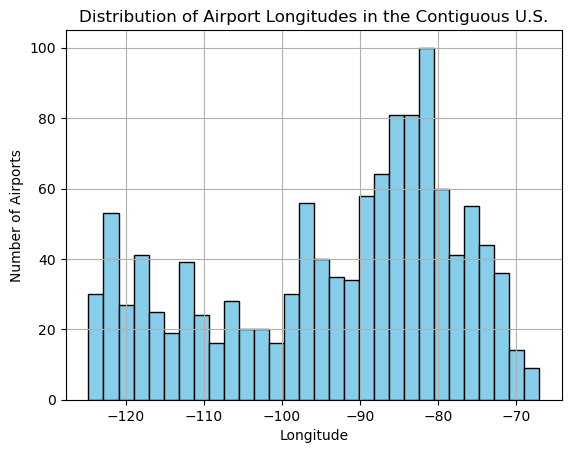

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
airports = pd.read_csv('https://joannabieri.com/introdatascience/data/airports.csv')

airports_us = airports[(airports['lon'] >= -125) & (airports['lon'] <= -66)]

plt.hist(airports_us['lon'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Airport Longitudes in the Contiguous U.S.')
plt.xlabel('Longitude')
plt.ylabel('Number of Airports')
plt.grid(True)
plt.show()


7. Question 7 (15 pts)

Recreate the plot included below using the flights data. Do the best you can to get as close as possible to what you see here. Once you have created the visualization, in no more than one paragraph, describe what you think the point of this visualization might be.

Hint: The visualization uses the variable arrival, which is not included in the flights data frame. You will have to create arrival yourself, it is a categorical variable that is equal to "ontime" when arr_delay <= 0 and "delayed" when arr_delay > 0. Hint: I used a lambda with an if else inside.

This graph shows how departure delays relate to whether flights arrive on time or late for NYC airports going to PHL and RDU in December. It shows that flights that leave late are more likely to also arrive late, while flights that leave on time usually stay on schedule. The graph also helps compare how delays differ between airports and destinations, showing which ones tend to have more or fewer delays. Overall, it helps us see how takeoff delays can affect arrival times.

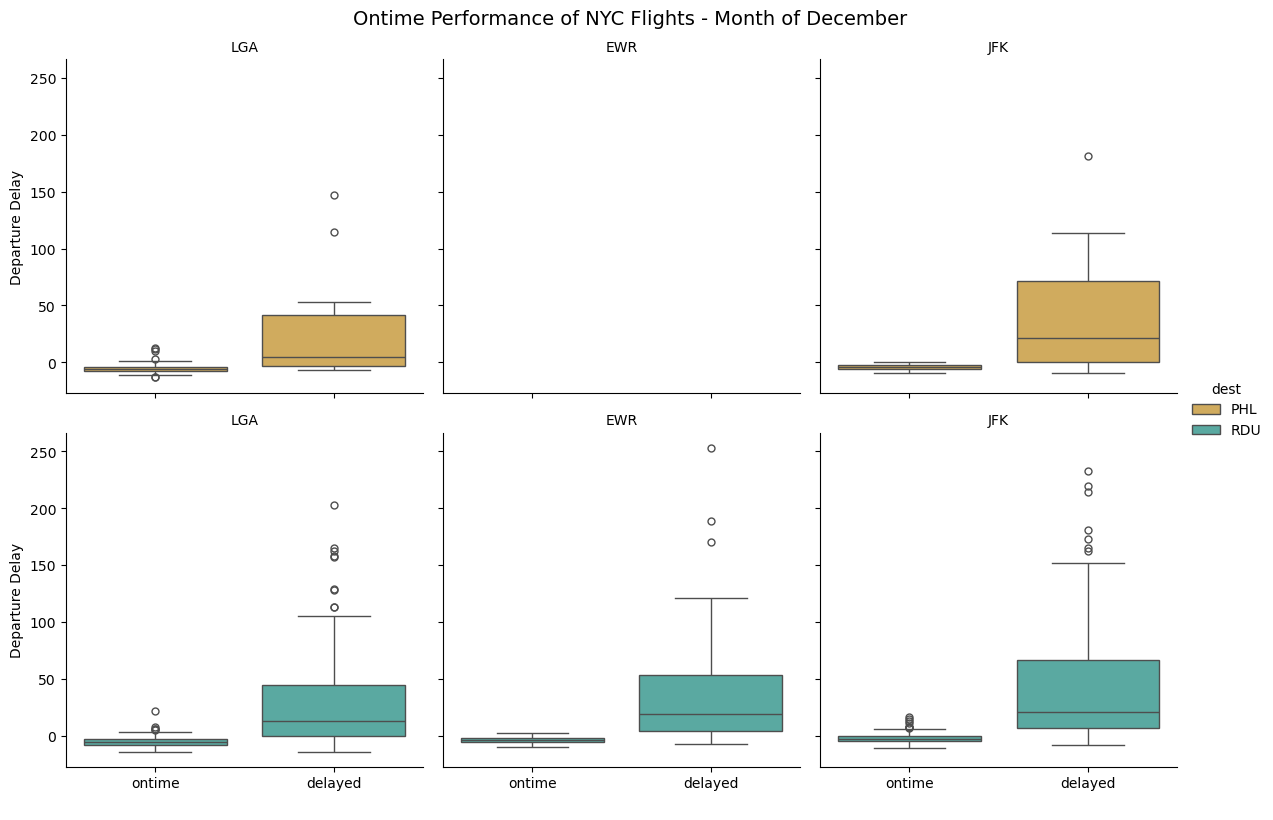

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_name = "flights"
flights = pd.read_csv("https://joannabieri.com/introdatascience/data/" + file_name + ".csv")

dec_flights = flights[flights['month'] == 12]

dec_flights['arrival'] = dec_flights['arr_delay'].apply(
    lambda x: 'ontime' if x <= 0 else 'delayed'
)

destinations = ['PHL', 'RDU']
origins = ['EWR', 'LGA', 'JFK']
dec_flights = dec_flights[(dec_flights['dest'].isin(destinations)) & (dec_flights['origin'].isin(origins))]

g = sns.catplot(
    data=dec_flights,
    x='arrival', y='dep_delay', col='origin', row='dest',
    hue='dest', kind='box', sharey=True,
    palette={'PHL': '#e3b24b', 'RDU': '#4db6ac'},
    height=4, aspect=1
)

# Titles and labels
g.set_axis_labels(" ", "Departure Delay")
g.set_titles("{col_name}")
plt.suptitle("Ontime Performance of NYC Flights - Month of December", y=1.02, fontsize=14)
plt.show()


8. Question 8 (15 pts)

Create your own data visualization that explores delayed flights. Here you are using any or all of the data sets to explore a question related to delayed flights. You are encouraged to come up with your own questions, but here are some ideas:

Is there an association between weather and flight delays?
Are large flights or small flights more likely to be late?
Are there certain destinations each month that are most likely to be late?
Can you find a pattern behind why some carriers are often delayed?

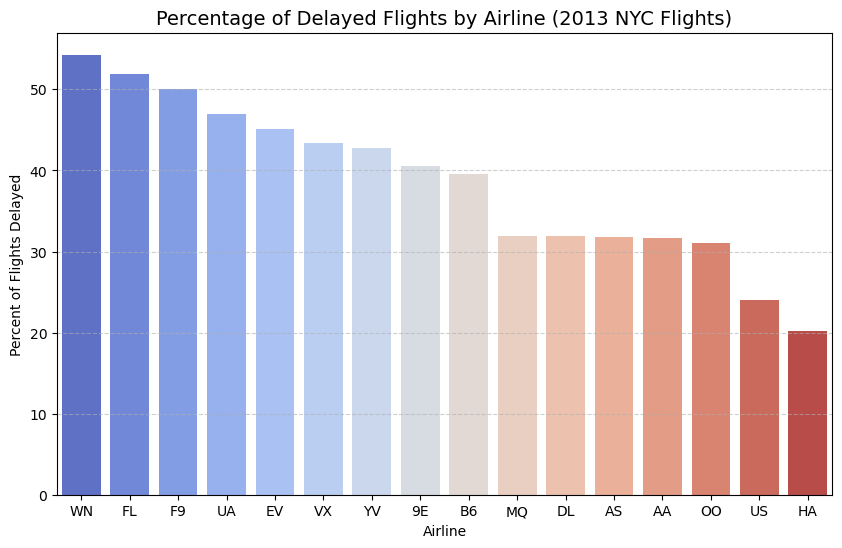

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load flights data
file_name = "flights"
flights = pd.read_csv("https://joannabieri.com/introdatascience/data/" + file_name + ".csv")

flights = flights.dropna(subset=['dep_delay'])

flights['status'] = flights['dep_delay'].apply(lambda x: 'delayed' if x > 0 else 'ontime')

carrier_delay = flights.groupby('carrier')['status'].value_counts(normalize=True).unstack().fillna(0) * 100
carrier_delay = carrier_delay.sort_values('delayed', ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=carrier_delay, x='carrier', y='delayed', palette='coolwarm')
plt.title('Percentage of Delayed Flights by Airline (2013 NYC Flights)', fontsize=14)
plt.xlabel('Airline')
plt.ylabel('Percent of Flights Delayed')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


1. Which airline has the highest percentage of delayed flights?

Envoy Air and ExpressJet have the highest percentage of delayed flights.

2. Which airline is the most reliable, with the fewest delays?

Hawaiian Airlines and Alaska Airlines are the most on-time airlines.

3. Are smaller regional airlines more likely to have delays than larger national carriers?

Smaller regional airlines usually have more delays than larger ones.

4. Do airlines with more total flights tend to have more or fewer delays?

Big airlines have more total delays because they fly more, but their delay rates aren’t always the worst.

5. Could differences in routes or destinations explain why some airlines have more delays?

Routes and destinations matter because busy airports or bad weather can cause more delays.

6. Are there certain airlines that are consistently delayed across all NYC airports

Envoy Air and ExpressJet are often delayed across all New York City airports.